# Tarea 1: Aprendizaje de Máquinas

### Autor: Arturo Lazcano

#### Profesor: Felipe Tobar
#### Auxiliares: Catherine Benavides, Camila Bergasa, Víctor Caro, Camilo Carvajal, Diego Cortéz y Stefano Schiappacasse

### Importación Librerías



In [14]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Alertas
import warnings
warnings.filterwarnings('ignore')

## P1: Regresión Lineal Bayesiana

(Esconder para ver solo la P2)

Sea $X$ una variable aleatoria en $\mathbb{R}^p$
e $Y$ variable aleatoria a valores $\mathbb{R}$. Consideremos el modelo de regresión lineal:
$Y = \beta_0 + \beta^T X + \epsilon$, con $\epsilon ∼ \mathcal{N} (0, \sigma^2)$, con $\beta = (\beta_1, . . . , \beta_p)^T$. Suponemos $\sigma^2$ conocido. Nos interesamos en la estimación Bayesiana de los parámetros $\theta = (\beta_0, \beta_1, . . . , \beta_p)$. Suponemos que la distribución $X$ no depende de $\theta$. Sean $(x_i, y_i) \ 1\leq i \leq N$ datos.

### (a) 

Demuestre que el estimador máximo a posteriori con un prior constante (que no depende de $\theta$) equivale al estimador de máxima verosimilitud.  

**Demostración:**  

Por definición de máximo a posteriori (MAP) tenemos que:  

$\theta_{MAP} = \underset{\Theta}{\operatorname{argmax}} p(\theta|\mathcal{D})
 = \underset{\Theta}{\operatorname{argmax}} \frac{p(\mathcal{D}|\theta) p(\theta)}{p(\mathcal{D})} = \underset{\Theta}{\operatorname{argmax}} p(\mathcal{D}|\theta) p(\theta)$  
 Pues $p(\mathcal{D})$ no depende de $\theta$ y no juega un rol en el argmax. Luego,  

 $ \underset{\Theta}{\operatorname{argmax}} p(\mathcal{D}|\theta) p(\theta) = 
 \underset{\Theta}{\operatorname{argmax}} \big[\log(p(\mathcal{D}|\theta)) + \log(p(\theta))\big] $  
 Ya que la función $\log$ es una función monótona creciente por lo cual el problema de optimización es equivalente. Así, si escogemos un prior constante (independiente de $\theta$, su logaritmo tampoco) juega un rol en encontrar el argmax por lo que podemos quitarlo de la ecuación. Así, obtenemos:  

 $\theta_{MAP} =  \underset{\Theta}{\operatorname{argmax}} \big[ \log(p(\mathcal{D}|\theta)) \big] = \underset{\Theta}{\operatorname{argmax}} \big[ p(\mathcal{D}|\theta) \big] = \theta_{MLE} \ $ ya que podemos pensar en quitar el logaritmo sin afectar al problema de optimización.

Supongamos que usamos el prior siguiente:  

$ p(\beta_i) = \frac{1}{\sqrt{2\pi}\tau} \cdot e^{- \frac{\beta_i^2}{2\tau^2}} $

### (b) 

Compute el estimador máximo a posteriori. Identifique a qué estimador conocido corresponde.  

**Respuesta:**  

Para obtener el máximo a posteriori, procedemos a calcular la expresión:  

$ \underset{\Theta}{\operatorname{max}} \big[ p(\theta|x,y) \big] = \underset{\Theta}{\operatorname{max}} \big[ p(y|x,\theta) p(\theta) \big] $  

En la ecuación anterior, $\theta$ son nuestros parámetros, es decir, $\theta = (\beta_0, ..., \beta_p)$.  
Luego, para calcular el primer término, podemos pensar en que al fijar el parámetro $\theta$, la probabilidad de un par de datos $(x,y)$ estará dada por una alejada de la recta $\beta_0 + \beta^T x$. Así, podemos pensar en una distribución normal pero centrada en $\beta_0 + \beta^T x$ de varianza $\sigma^2$. Esto se refleja en la siguiente ecuación:  

$ p(y|x,\theta) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-1}{2} \big(\frac{y - (\beta_0 + \beta^T x)}{\sigma}\big)^2} $  

Luego, por enunciado, $ p(\beta_i) = \frac{1}{\sqrt{2\pi}\tau} e^{- \frac{\beta_i^2}{2\tau^2}} $ por lo que procedemos a multiplicar estas dos expresiones:  

$\frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-1}{2} \big(\frac{y - (\beta_0 + \beta^T x)}{\sigma}\big)^2} \cdot \frac{1}{\sqrt{2\pi}\tau} \prod_{i = 1}^{p} e^{- \frac{\beta_i^2}{2\tau^2}}$   
$ = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2} \cdot \frac{1}{\sqrt{2\pi}\tau} \prod_{i = 1}^{p} e^{- \frac{\beta_i^2}{2\tau^2}}$  
$= \frac{1}{2\pi \sigma \tau} e^{\frac{-1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2} \cdot \prod_{i = 1}^{p} e^{- \frac{\beta_i^2}{2\tau^2}}$  

Por lo tanto, $\theta_{MAP} = \underset{\Theta}{\operatorname{max}} \bigg[ \frac{1}{2\pi \sigma \tau} e^{\frac{-1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2} \cdot \prod_{i = 1}^{p} e^{- \frac{\beta_i^2}{2\tau^2}} \bigg] $  
y podemos tirar $\log$ por ser una función monótona creciente y no afectar al cálcuo del máximo:  

$\theta_{MAP} = \underset{\Theta}{\operatorname{max}}\bigg[ \log\bigg( \frac{1}{2\pi \sigma \tau} e^{\frac{-1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2} \cdot \prod_{i = 1}^{p} e^{- \frac{\beta_i^2}{2\tau^2}} \bigg) \bigg]$  
$ = \underset{\Theta}{\operatorname{max}}\bigg[ \log\bigg( \frac{1}{2\pi \sigma \tau} e^{\frac{-1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2}\bigg) + \log\bigg(\prod_{i = 1}^{p} e^{- \frac{\beta_i^2}{2\tau^2}} \bigg) \bigg] $  
$ = \underset{\Theta}{\operatorname{max}}\bigg[ \log\big( \frac{1}{2\pi \sigma \tau} \big) - {\frac{1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2}\bigg) + \sum_{i = 1}^{p}\log\big( e^{- \frac{\beta_i^2}{2\tau^2}} \big) \bigg] $  
$ = \underset{\Theta}{\operatorname{max}}\bigg[ \log\big( \frac{1}{2\pi \sigma \tau} \big) - {\frac{1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2}\bigg) + \sum_{i = 1}^{p} - \frac{\beta_i^2}{2\tau^2} \bigg] $  
$ = \underset{\Theta}{\operatorname{max}}\bigg[ - {\frac{1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2}\bigg) + \sum_{i = 1}^{p} - \frac{\beta_i^2}{2\tau^2} \bigg] $  

Ya que el término $\log\big( \frac{1}{2\pi \sigma \tau} \big)$ no depende de $\theta$ y como $máx f = -mín -f$ obtenemos:  

$\theta_{MAP} = \underset{\Theta}{\operatorname{min}}\bigg[{\frac{1}{2\sigma^2} (y - (\beta_0 + \beta^T x))^2}\bigg) + \sum_{i = 1}^{p}\frac{\beta_i^2}{2\tau^2} \bigg] $ y multiplicando por $2\sigma^2 \neq 0$ resulta:  

$\theta_{MAP} = \underset{\Theta}{\operatorname{min}}\bigg[{ (y - (\beta_0 + \beta^T x))^2}\bigg) + \frac{2\sigma^2}{2\tau^2}\sum_{i = 1}^{p}\beta_i^2 \bigg] $  

$ = \underset{\Theta}{\operatorname{min}}\bigg[{ (y - (\beta_0 + \beta^T x))^2}\bigg) + \frac{\sigma^2}{\tau^2} ||\theta||_2^2 \bigg] $  

Siendo este la solución del problema de regularización de Tikhonov (Ridge regression) donde $\frac{\sigma^2}{\tau^2} >0$, y como se puede ver en el apunte, página 19, su solución es explícita y viene de calcular el gradiente con respecto a $\theta$ e imponer esto igual a 0. Así, si definimos la expresión anterior como $J$ y $\rho := \sigma^2/\tau^2$, queda:  

$ \nabla_{\theta} J = -2(Y-X\theta)^TX + 2\rho\theta^T = 0$  
$ ⟺ -Y^TX + \theta X^TX + \rho\theta^T = 0$  
$ ⟺ \theta^T = Y^TX(X^TX + \rho I_d)^{-1}$ donde $(X^TX + \rho I_d)$ es s.d.p por lo cual es invertible  
$ ⟺ \theta = (X^TX + \rho I_d)^{-1}X^TY$  

Finamente, concluímos que $\theta_{MAP} = (X^TX + \rho I_d)^{-1}X^TY$ es el estimador de Ridge.

### (c) 

Considere los casos


*   $\tau → \infty$
*   $\tau → 0$  

Argumente qué sucede en cada caso, tanto en términos del estimador encontrado, como en términos “Bayesianos” (esto es, piense en la forma que tendrían los priors en ambos casos).



**Respuesta:**  

* $\tau → \infty:$ El estimador $\hat{\theta} = (X^TX + \frac{\sigma^2}{\tau^2} I_d)^{-1}X^TY$ tiende a $\hat{\theta} = (X^TX)^{-1}X^TY$, es decir, que el estimador tiende a ser el mínimos cuadrados. Esto también se puede ver en su formulación al problema de optimización, pues al hacer tender $\tau$ a $\infty$ lo que hago es quitar la restricción de regularización, recuperando el problema original (sin regularización).  
Con respecto al prior, la distribución normal tiende a una distribución uniforme que sólo toma valores iguales a 0, sin embargo, al ser una distribución de probabilidad, esta sigue integrando uno, pero a lo largo de toda la recta real. Esto se puede pensar como una distribución uniforme que se acerca lo que más queramos al 0 pero que no es justo igual a 0.  

* $\tau → 0:$  El estimador en este caso queda un término que tiende a infinito en la expresión $\hat{\theta} = (X^TX + \frac{\sigma^2}{\tau^2} I_d)^{-1}X^TY$, por lo tanto, veamos mejor el problema de optimización correspondiente:  
$\hat{\theta} = \underset{\Theta}{\operatorname{argmin}} \bigg[||Y-X\theta||^2 + \rho||\theta||^2_2\bigg] $  
Acá, vemos que, como $\tau → 0:$, $\rho → \infty:$ por lo que el único caso en el que el problema está bien definido es cuando los parámetros $\theta$ tienden a 0, a la misma (o más) rapidez que $\rho$. Es por esto que, a pesar de no conocer la forma explícita de $\hat{\theta}$ necesitamos que los $\theta$ tiendan a 0.  
Con respecto al prior, vemos que la forma de la normal se va haciendo cada vez más angosta, pues la varianza está tendiendo a 0. Así, al punto límite, vemos que la distribución original (Gaussiana) pasa a ser un delta de Dirac.  
Recordemos que esta "función" (distribución en el sentido matemático) también cumple la propiedad de integrar 1 sobre los reales. Notar que, como estamos haciendo tender la varianza a 0, el punto el cual valdrá 1 en el delta de Dirac es justamente la media, es decir, $0$.

### (d) 

Ahora denote $\rho = \frac{\sigma^2}{\tau^2}$ que lo interpretaremos como un hiper-parámetro de nuestro modelo.  
Demuestre que el estimador resultante de la minimización es insesgado si y sólo si $\rho = 0$.

**Respuesta:**  

Recordemos que la definición de estimador insesgado es que para un estimador $\hat{g}(X)$ de $g(\theta)$, se cumpla que $\mathbb{E}(\hat{g}(x)) = g(\theta)$.  

Veamos que el estimador $\hat{\theta} = (X^TX + \rho I_d)^{-1}X^TY $ se puede escribir de la siguiente forma:  

$\hat{\theta} = (X^TX + \rho I_d)^{-1}X^TY = (X^TX + \rho I_d)^{-1} X^TX(X^TX)^{-1} X^TY $  
Donde podemos identificar que los últimos términos corresponden al estimador de mínimos cuadrados ordinario, ie, $\hat{\theta}_{MC}$ por lo tanto obtenemos:  

$\hat{\theta} = (X^TX + \rho I_d)^{-1}X^TY = (X^TX + \rho I_d)^{-1} X^TX \ \hat{\theta}_{MC}$. Así,  

$\mathbb{E}(\hat{\theta} | X) = (X^TX + \rho I_d)^{-1} X^TX \ \mathbb{E}(\hat{\theta}_{MC})$ donde sabemos que el estimador $\hat{\theta}_{MC}$ es insesgado, por lo cual su esperanza es $\mathbb{E} (\hat{\theta}_{MC}) = \theta$. Así, reemplazando en la ecuación anterior:  

$\mathbb{E}(\hat{\theta} | X) = (X^TX + \rho I_d)^{-1} X^TX \ \theta$.  

En la expresión anterior podemos ver que la única opción de que nuestro estimador sea insesgado es que la matriz $(X^TX + \rho I_d)^{-1} X^TX$ sea la identidad. Notemos que esto ocurre si, y solo si, $\rho = 0$. La implicancia podemos pensar en su contrarecíproca y es trivial ver que, si $\rho \neq 0$, entonces $(X^TX + \rho I_d)^{-1} X^TX$ no es la matriz identidad. Probando el resultado pedido.

## P2: Regresión lineal y clasificación

### Importación Base de Datos

In [15]:
# Leer archivo (subirlo a "files" de colab es mucho más rápido)

#from google.colab import files
#uploaded = files.upload()

In [16]:
# Leer dataframe
df = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.tsv', sep='\t') 

# Seleccionar 20% de datos
random.seed(20470051)
df = df.sample(frac = 0.20, random_state = 20470051)

# Rehacer índice
new_index = [i for i in range(len(df))]
df.index = new_index

df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,44731959,R19FNQKKQAC3Q,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,is for me fantastic. Is fast and safe,"The Gift Card - Email, is for me fantastic. Is...",2014-08-01
1,US,12349341,R8Z9IQC3YD4AU,B00A48G0D4,848703272,Amazon eGift Card - Happy Birthday (Candles),Gift Card,5,0,0,N,Y,"Stop with the Frantic Shopping, Already!",With numerous styles and types and seasons fro...,2013-10-31
2,US,4758673,R3PUB7D0VFJHFF,B0091JKYLQ,941945933,Amazon.com Gift Card for Any Amount in a Santa...,Gift Card,5,0,0,N,Y,Christmas gift card.,It went over very big with the family I sent i...,2015-01-04
3,US,46642216,R21CZQKTT6V7PC,B00BWDGYL8,610435021,Amazon eGift Card - Birthday Hazard (Animated)...,Gift Card,5,0,0,N,Y,For the 'senior' birthday!,The perfect gift card for my sister who just t...,2015-06-15
4,US,24752152,R3R4RCSR9VUH2F,B00B2TFSO6,89375983,Amazon eGift Card - Thank You (Note),Gift Card,4,0,0,N,Y,Simple design but can be used always,Can be improved with stylish design and more d...,2014-01-17


In [17]:
# Pequeño análisis exploratorio
print('Columnas dataframe: \n', '\n', df.columns.values.tolist())
print('\n')
print('Cantidad de datos: \n', '\n', len(df))

Columnas dataframe: 
 
 ['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']


Cantidad de datos: 
 
 26409


### (a)

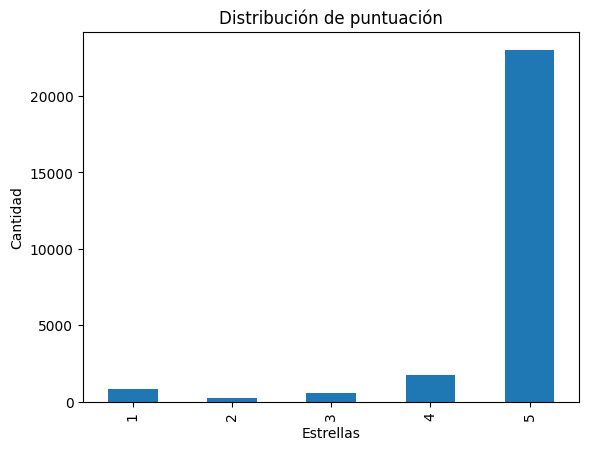

In [18]:
# Gráfico de datos sobre la columna star_rating
df['star_rating'].value_counts(sort=False).reindex(range(1,6)).plot.bar()
plt.title('Distribución de puntuación')
plt.ylabel('Cantidad')
plt.xlabel('Estrellas')
plt.show()

### (b)

In [19]:
# Creación de columna "length_of_review"
df['length_of_review'] = df['review_body'] # + df['review_headline']
df['length_of_review'] = df['length_of_review'].replace(np.nan, '')
df['length_of_review'] = df['length_of_review'].apply(lambda x: len(x))

# Reemplazo de "Y" por 1 y "N" por 0 en la columna "verified_purchase"
df['verified_purchase'] = df['verified_purchase'].replace('Y', 1)
df['verified_purchase'] = df['verified_purchase'].replace('N', 0)

In [20]:
# Separación de conjunto de entrenamiento y testeo
X = df[['verified_purchase', 'total_votes', 'length_of_review']]
y = df['star_rating']

#Escalamos los datos
scaler = StandardScaler() 
X[['total_votes', 'length_of_review']] = scaler.fit_transform(X[['total_votes', 'length_of_review']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20470051)

In [21]:
# Regresión lineal
regr = LinearRegression()

# fit
regr.fit(X_train, y_train)

# extraer parámetros del modelo
parametros = [regr.intercept_] + list(regr.coef_)
print('Coeficientes de la regresión lineal: \n')
for i in range(4):
  print(f'theta_{str(i)}: ', parametros[i])

# Printeo del ECM
print('\n Error Cuadrático Medio (ECM): \n')
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
print('Conjunto de entrenamiento: ', mean_squared_error(y_train, y_pred_train))
print('Conjunto de testeo: ', mean_squared_error(y_test, y_pred_test))

Coeficientes de la regresión lineal: 

theta_0:  4.501517491697115
theta_1:  0.24918125088952092
theta_2:  -0.04580985872401752
theta_3:  -0.18402544668759033

 Error Cuadrático Medio (ECM): 

Conjunto de entrenamiento:  0.6218960596543702
Conjunto de testeo:  0.6713566125549589


Estos parámetros $(\theta_0, \theta_1, \theta_2, \theta_3)$ son el peso que toma cada variable de entrada ($x$) para predecir de mejor forma la variable target ($y$) que en este caso es `star_rating`. Es decir, representan la relación que deben tener en un modelo lineal para ajustar de mejor forma los datos. En este caso, $\theta_0$ es el intercepto, es decir, el término independiente del modelo lineal.  

Con respecto a ECM, como sabemos es una métrica de evaluación con rango en $[0, \infty]$, donde mientras más cercano al 0, significa que el modelo entrega un mejor resultado sobre sus predicciones con respecto al dato real.  
En este caso los ECM en el conjunto de entrenamiento y testeo son similares y están alrededor de 0.6 - 0.7, lo cual es un número poco interpretable sin datos extras. Sin embargo, que los errores en los distintos conjuntos sean similares es una buena señal de que el modelo no tuvo overfitting.

### (c)

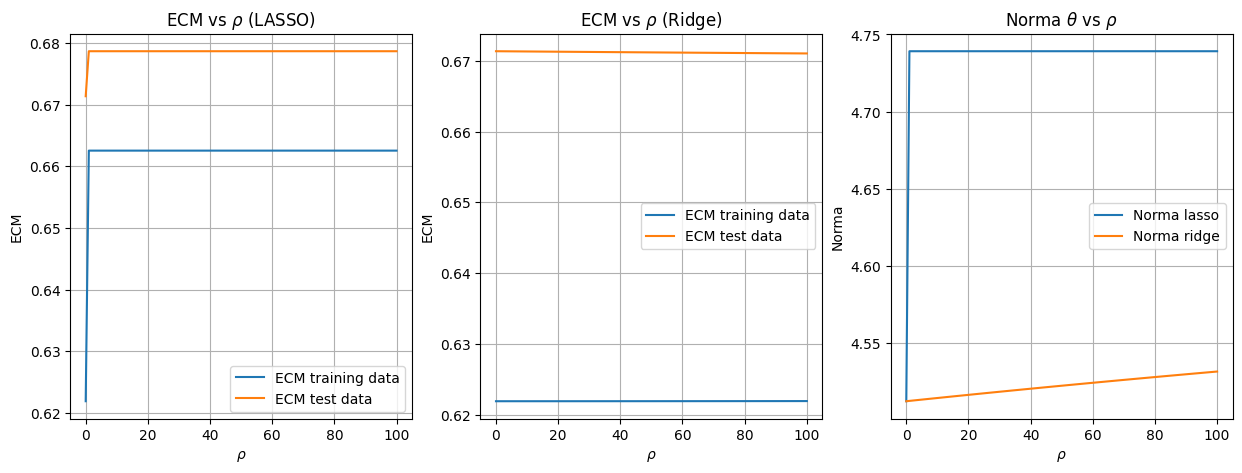

In [22]:
# Regresión LASSO y Ridge
Rho = np.linspace(0, 100, 100)

ECM_train_lasso = []
ECM_test_lasso = []
theta_lasso = []

ECM_train_ridge = []
ECM_test_ridge = []
theta_ridge = []

for rho in Rho:
  # LASSO
  lasso = linear_model.Lasso(alpha=rho)
  lasso.fit(X_train, y_train)
  y_pred_train = lasso.predict(X_train)
  y_pred_test = lasso.predict(X_test)
  ECM_train_lasso.append(mean_squared_error(y_train, y_pred_train))
  ECM_test_lasso.append(mean_squared_error(y_test, y_pred_test))
  theta_lasso.append([lasso.intercept_] + list(lasso.coef_))
  # Ridge
  ridge = linear_model.Ridge(alpha=rho)
  ridge.fit(X_train, y_train)
  y_pred_train_r = ridge.predict(X_train)
  y_pred_test_r = ridge.predict(X_test)
  ECM_train_ridge.append(mean_squared_error(y_train, y_pred_train_r))
  ECM_test_ridge.append(mean_squared_error(y_test, y_pred_test_r))
  theta_ridge.append([ridge.intercept_] + list(ridge.coef_))

# gráfico ECM vs rho
# LASSO
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15,5) 
axs[0].plot(Rho, ECM_train_lasso, label='ECM training data')
axs[0].plot(Rho, ECM_test_lasso, label='ECM test data')
axs[0].set_title(r'ECM vs $\rho$ (LASSO)')
axs[0].set_xlabel(r'$\rho$')
axs[0].set_ylabel('ECM')
axs[0].legend(loc="lower right")
axs[0].grid()
#Ridge
axs[1].plot(Rho, ECM_train_ridge, label='ECM training data')
axs[1].plot(Rho, ECM_test_ridge, label='ECM test data')
axs[1].set_title(r'ECM vs $\rho$ (Ridge)')
axs[1].set_xlabel(r'$\rho$')
axs[1].set_ylabel('ECM')
axs[1].legend(loc="center right")
axs[1].grid()
# norma parámetros
axs[2].plot(Rho, list(map(lambda x: np.linalg.norm(x), theta_lasso)), label='Norma lasso')
axs[2].plot(Rho, list(map(lambda x: np.linalg.norm(x), theta_ridge)), label='Norma ridge')
axs[2].set_title(r'Norma $\theta$ vs $\rho$')
axs[2].set_xlabel(r'$\rho$')
axs[2].set_ylabel('Norma')
axs[2].legend(loc="center right")
axs[2].grid()
plt.show()

En el tercer gráfico sobre la norma de los parámetros podemos ver que, en magnitud, son similares para ambos modelos, sin embargo, que dependiendo del valor de $\rho$, la norma puede tener tendencias a crecer. En este caso, la norma de $\theta$ para el modelo de Tikhonov es siempre menor al de LASSO.

### (d)

La siguiente celda contiene un modelo polinómico de grado 2 donde, para una entrada tipo $[x,y]$, su formulación matemática es la siguiente:  

$ [1,x,y,x^2,y^2,xy] $  

Es decir, agrega 6 columnas al modelo que son tomadas en cuenta para su entrenamiento (en la práctica, el método fit_transform agrega otra columna de 1's para ajustar dimensionalidad/bias)

In [23]:
# definimos el grado del polinomio
poly_grade = 2

#escalamos los datos
X_poly_train = PolynomialFeatures(poly_grade).fit_transform(X_train)
X_poly_test = PolynomialFeatures(poly_grade).fit_transform(X_test)

#ajustamos el modelo
clf = LinearRegression().fit(X_poly_train, y_train)

# Printeos de ECM
print('Error Cuadrático Medio (ECM): \n')
y_pred_train = clf.predict(X_poly_train)
y_pred_test = clf.predict(X_poly_test)
print('Conjunto de entrenamiento: ', mean_squared_error(y_train, y_pred_train))
print('Conjunto de testeo: ', mean_squared_error(y_test, y_pred_test))

Error Cuadrático Medio (ECM): 

Conjunto de entrenamiento:  0.6099806560126493
Conjunto de testeo:  0.6494805819515056


### (e)

A modo de elegir un modelo que resuelva este problema, recomendaría la regresión de Ridge ya que posee menor ECM, lo cual es un buen indicador que el modelo ajusta de mejor forma, notando que en el conjunto de testeo este valor tampoco crece de forma abrupta. Sin embargo, tanto el modelo lineal como de LASSO se escapan con sus métricas, ya que para esta cantidad de datos y tipo de problema todos estos modelos se ajustan de forma similar.  
Pensando en el principio de parsimonia, el modelo lineal es también una buena opción.  

En caso de usar mayor cantidad de datos, habría que considerar el tiempo de ejecución que pudiésen tener estos algoritmos para tomar en cuenta este factor en la decisión final.

### (f)

In [24]:
# función softmax (sigmoide para reg logistica con 2 clases)
def softmax_(x):
  """ A un vector x le calcula la expresión e^x_i / sum_i(e^x_i)
    Para cada i.

    Parameters
    ----------
    x : array
        Vector al que se calcula la softmax

    Returns
    -------
    array: 
        vector con softmax aplicado
  """
  return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1,1)

class MultipleLogRegression:
  """ Clase de Regresión Logística
  """
  def __init__(self, lr=0.001, iter=100, umbral=0.001):
    self.lr = lr
    self.iter = iter
    self.umbral = umbral
    self.perdida = []
    self.pesos = []

  def fit(self, X, Y):
    """ Entrena el objeto creado con os conjuntos de datos X, Y.

    Parameters
    ----------
    X : pandas.DataFrame
        Conjunto al que se le aplica la regresión

    Y : pandas.DataFrame
        Conjunto que indica las clases de los datos en X

    Returns
    -------
    self: 
        Objeto entrenado
    """
    # Pasarlos a np.array
    X = np.array(X)
    Y = np.array(Y)
    # Clases
    self.clases = np.unique(Y)
    X = np.insert(X, 0, 1, axis=1) # bias/sesgo
    Y = self.one_hot_encoding(Y) # Pasar Y a one-hot-encoding
    # Parámetros del modelo
    self.pesos = np.zeros((len(self.clases),X.shape[1]))
    i = 0
    while (i <= self.iter):
      # gradiente descendiente
      pred = softmax_(np.dot(X, self.pesos.T).reshape(-1,len(self.clases)))
      self.perdida.append(-1 * np.mean(Y*np.log(pred)))
      error = Y - softmax_(np.dot(X, self.pesos.T).reshape(-1,len(self.clases)))
      nuevo = (self.lr * np.dot(error.T, X))
      self.pesos = self.pesos + nuevo
      i = i+1
    return self

  def one_hot_encoding(self, Y):
    """ Aplica la técnica one-hot-encoding al conjunto Y.

    Parameters
    ----------
    Y : pandas.DataFrame
        Conjunto al que queremos transformar a {0,1}^k
        donde k es el número de clases.

    Returns
    -------
    array: 
        Matriz con cada fila de la forma {0,1}^k
    """
    dicc_clases = {c:i for i,c in enumerate(self.clases)} # diccionario con las clases de Y
    return np.eye(len(self.clases))[np.vectorize(lambda c: dicc_clases[c])(Y).reshape(-1)]

  def predict(self, X):
    """ Predice las clases a los datos del conjunto X.

    Parameters
    ----------
    X : pandas.DataFrame
        Conjunto con los datos de cada feature al cual se le quiere
        predecir su clase.

    Returns
    -------
    array: 
        Matriz con cada predicción sobre su clase
    """
    X = np.array(X) # Pasar X a np.array
    X = np.insert(X, 0, 1, axis=1) # bias/sesgo
    prob = softmax_(np.dot(X, self.pesos.T).reshape(-1,len(self.clases))) # Vector de probabilidades
    pred = np.argmax(prob, axis=1) + 1 # Asignar la máxima probabilidad como la clase elegida
    return pred

In [25]:
# Objeto regresión logística
regr_lg = MultipleLogRegression()

# Entrenamiento
regr_lg.fit(X_train,y_train)

# Printeos ECM
print('Error cuadrático medio (ECM) Regresión Logística Multiclase: \n')
y_pred_train = regr_lg.predict(X_train)
y_pred_test = regr_lg.predict(X_test)
print('Conjunto de entrenamiento: ', mean_squared_error(y_train, y_pred_train))
print('Conjunto de testeo: ', mean_squared_error(y_test, y_pred_test))

Error cuadrático medio (ECM) Regresión Logística Multiclase: 

Conjunto de entrenamiento:  0.769269606193201
Conjunto de testeo:  0.8186293070806513


En la celda anterior se pueden ver los resultados de la regresión logistica construida desde 0. Con respecto al ECM, estos valores son un poco más altos que el de los modelos vistos anteriormente, del orden de 0.1 - 0.3 (probando varios conjuntos).  
Esto se puede deber al tipo de modelo que estamos imponiendo a resolver el problema como a la implementación no optimizada que tiene esta regresión logistica pues recordemos que, en los modelos anteriores, estos vienen de librerías expertas en la implementación y optimización.  

Es por esto que, para este problema, seguiría recomendando uno de los modelos vistos en las preguntas anteriores.

### (g)

En la teoría, un modelo de regresión es más adecuado que uno de clasificación, meramente por el hecho de que el target en este dataset es `star_rating`, es decir, es un número del 1 al 5. Así, métodos de regresión interpretan fácilmente que un número del estilo 4.8 es más cercano a la predicción del valor 5 que del valor 1.  
Recordemos que los modelos de clasificación suelen ser usados con datos categóricos o que posean "diferencias" similares, como puede ser clasificar, por ejemplo, si un animal es perro, gato o conejo, ya que no hay "un animal más cerca que otro".  

Sin embargo, en la práctica, dependiendo de os datos, podemos encontrar escenarios muy distintos. Es así, como a pesar de que en la teoría un modelo es mejor que otro, siempre se deben pensar (y ojalá probar) en ambos métodos.

In [26]:
# Pasar .ipynb a html (después pasarlo a .pdf es más lindo)
# !jupyter nbconvert --to html /content/Tarea_1_ML\ \(1\).ipynb